# Jiaming Lin

In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# 1 How Is Basketball Game Score Calculated?

1. (2pt) Load the data (harden-18-19.csv). Do basic sanity checks.

In [2]:
jh = pd.read_csv("harden-18-19.csv.bz2")
print(jh.shape)
print(jh.isna().sum())
jh.head()

(82, 30)
Rk             0
G              4
Date           0
Age            0
Tm             0
Unnamed: 5    41
Opp            0
Unnamed: 7     0
GS             0
MP             0
FG             0
FGA            0
FG%            0
3P             0
3PA            0
3P%            0
FT             0
FTA            0
FT%            1
ORB            0
DRB            0
TRB            0
AST            0
STL            0
BLK            0
TOV            0
PF             0
PTS            0
GmSc           0
+/-            0
dtype: int64


,Rk,G,Date,Age,Tm,Unnamed: 5,Opp,Unnamed: 7,GS,MP,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-
0,1,1.0,2018-10-17,29-052,HOU,NaN,NOP,L (-19),1,34:43,...,7,9,10,3,1,4,2,18,18.9,-23
1,2,2.0,2018-10-20,29-055,HOU,@,LAL,W (+9),1,37:50,...,6,7,5,2,1,6,2,36,27.0,-3
2,3,3.0,2018-10-21,29-056,HOU,@,LAC,L (-3),1,39:45,...,4,4,14,2,0,3,1,31,26.4,+5
3,4,4.0,2018-10-24,29-059,HOU,NaN,UTA,L (-11),1,31:38,...,4,5,7,1,0,7,4,29,17.7,-5
4,5,NaN,2018-10-26,29-061,HOU,NaN,LAC,L (-20),Inactive,Inactive,...,Inactive,Inactive,Inactive,Inactive,Inactive,Inactive,Inactive,Inactive,Inactive,Inactive


2. (2pt) How many games did James Harden play in the 2018-2019 season?
Note: the data also includes games where he did not play.

In [3]:
jh.G[81]
# He played 78 games in 2018-2019 season.

78.0

3. (4pt) Clean the data and ensure the relevant variables are of numeric type so we can use those
in the regression models. It is your task to nd what is wrong with the data in its present
form (it is downloaded directly from basketball-reference.com), and x these issues.
Hint: a good way to transform text to number is pd.to_numeric.
1

In [4]:
# I will clean the data when I need those varaibles.

4. (4pt) Analyze the game score GmSc. What is its distribution? Range? Mean? Standard
deviation?


1.2000000476837158 52.20000076293945 26.708969116210938 10.053882598876953


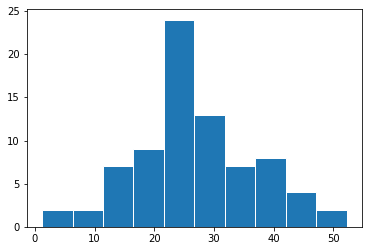

In [5]:
jh = jh.dropna(subset = ["G"])
jh.GmSc = pd.to_numeric(jh.GmSc, downcast = "float")
gmsc = jh.GmSc
_ = plt.hist(gmsc, edgecolor = "white")
print(gmsc.min(), gmsc.max(), gmsc.mean(), gmsc.std())

# The distribution is approximately normally distributed.
# The range of game score is from 1.2 to 52.2 with mean 26.71 and standard deviation 10.05.

5. (5pt) First, let's run a simple regression model explaining game score GmSc by eld goal
attempts FGA:
GmScg = β0 + β1 · FGAg + g
where g indexes games. (Call this Model 5).
Display the results and answer the following questions:
(a) What is the interpretation of Intercept (β0)?
(b) What is the interpretation of FGA (β1)? Is it statistically signicant?

In [6]:
jh.FGA = pd.to_numeric(jh.FGA, downcast = "integer")
m5 = smf.ols("GmSc ~ FGA", data=jh).fit()
m5.summary()

# b0 means that when Filed goal attempts of James Harden is 0, his game score is 11.60.
# b1 means that when James Harden increase his Field goal by 1, his game score will increase by 0.6175.
# b1 is statistically significant because P value is so small.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   GmSc   R-squared:                       0.151
Model:                            OLS   Adj. R-squared:                  0.140
Method:                 Least Squares   F-statistic:                     13.54
Date:                Tue, 24 Nov 2020   Prob (F-statistic):           0.000433
Time:                        17:51:55   Log-Likelihood:                -283.80
No. Observations:                  78   AIC:                             571.6
Df Residuals:                      76   BIC:                             576.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     11.5963      4.240      2.735      0.008       3.152      20.041
FGA            0.6175      0.168      3.680      0.000       0.283       0.952
==============================================================================
Omnibus:                        0.602   Durbin-Watson:                   1.884
Prob(Omnibus):                  0.740   Jarque-Bera (JB):                0.739
Skew:                          -0.137   Prob(JB):                        0.691
Kurtosis:                       2.609   Cond. No.                         102.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

6. (7pt) Next, let's analyse how is game score related to eld goals (FG) and eld goal attempts
(FGA). Estimate the model
GmScg = β0 + β1 · FGg + β2 · FGAg + g.
2
(Call this Model 6).
If done correctly, you should see results approximately 6.9, 3.4, -0.7.
Answer the following questions:
(a) What is the interpretation of FG? Is it statistically signicant?
(b) What is the interpretation of FGA (β2)? Is it statistically signicant?
(c) How do you explain the fact that model 5 shows positive and model 6 shows a negative
estimate for FGA?
(d) What is the R
2 of the model? How does it compare to the model 5?

In [7]:
jh.FG = pd.to_numeric(jh.FG, downcast = "integer")
m6 = smf.ols("GmSc ~ FG + FGA", data=jh).fit()
m6.summary()

# FG is b1, it means when James Harden get 1 increase on field goals, his game score will increase by 3.4. It is statistically
# significant.
# FGA is b2, it is also statistically significant, it means when James Harden get 1 increase on field goal attempts, his game score will
# decrease by 0.69.
# It is just slope values varies as we add more variable to build the least square regression line.
# R^2 is 0.573 which is greater than the last one (0.151).

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   GmSc   R-squared:                       0.573
Model:                            OLS   Adj. R-squared:                  0.562
Method:                 Least Squares   F-statistic:                     50.42
Date:                Tue, 24 Nov 2020   Prob (F-statistic):           1.33e-14
Time:                        17:51:55   Log-Likelihood:                -256.97
No. Observations:                  78   AIC:                             519.9
Df Residuals:                      75   BIC:                             527.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.8608      3.075      2.231      0.029       0.735      12.987
FG             3.4082      0.396      8.616      0.000       2.620       4.196
FGA           -0.6940      0.194     -3.584      0.001      -1.080      -0.308
==============================================================================
Omnibus:                        2.958   Durbin-Watson:                   1.880
Prob(Omnibus):                  0.228   Jarque-Bera (JB):                1.904
Skew:                           0.154   Prob(JB):                        0.386
Kurtosis:                       2.299   Cond. No.                         113.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

7. (5pt) Now let's include personal fouls (PF) to the previous model 6. Estimate the new model
and answer the following questions:
(a) Interpret the eect of PF.
(b) Does adding fouls change the estimates for FG and FGA in any major way?
(c) What is R
2 of the model? How does it compare to the model 6?


In [8]:
jh.PF = pd.to_numeric(jh.PF, downcast = "integer")
m7 = smf.ols("GmSc ~ FG + FGA + PF", data=jh).fit()
m7.summary()

# When James Harden get 1 increase in his personal fouls, his game score will decrease by 1.2.
# Adding fouls does not change FG and FGA a lot.
# R^2 is 0.595, which is greater than 0.573.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   GmSc   R-squared:                       0.595
Model:                            OLS   Adj. R-squared:                  0.579
Method:                 Least Squares   F-statistic:                     36.24
Date:                Tue, 24 Nov 2020   Prob (F-statistic):           1.61e-14
Time:                        17:51:55   Log-Likelihood:                -254.94
No. Observations:                  78   AIC:                             517.9
Df Residuals:                      74   BIC:                             527.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.9446      3.393      2.931      0.004       3.184      16.705
FG             3.3884      0.388      8.730      0.000       2.615       4.162
FGA           -0.6621      0.191     -3.473      0.001      -1.042      -0.282
PF            -1.1670      0.588     -1.986      0.051      -2.338       0.004
==============================================================================
Omnibus:                        2.480   Durbin-Watson:                   1.855
Prob(Omnibus):                  0.289   Jarque-Bera (JB):                1.936
Skew:                           0.230   Prob(JB):                        0.380
Kurtosis:                       2.380   Cond. No.                         128.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

8. (7pt) Now include all the independent numerical variables, i.e. FG, FGA, 3P, 3PA, FT, FTA,
ORB, DRB, AST, STL, BLK, TOV, PF into the model. Estimate it, and discuss the results.
Answer the following questions:
(a) How do standard errors and t-values look like in this model?
(b) What is R
2 of this model? What does it tell you about how game score is calculated?
(c) What do the results tell about turnover (TOV )? Is it good or bad for the team?
Suggestion: check out patsy Q() quoting to include non-valid variable names

In [9]:
jh["3P"] = pd.to_numeric(jh["3P"], downcast = "integer")
jh["3PA"] = pd.to_numeric(jh["3PA"], downcast = "integer")
jh["FT"] = pd.to_numeric(jh["FT"], downcast = "integer")
jh["FTA"] = pd.to_numeric(jh["FTA"], downcast = "integer")
jh["ORB"] = pd.to_numeric(jh["ORB"], downcast = "integer")
jh["DRB"] = pd.to_numeric(jh["DRB"], downcast = "integer")
jh["AST"] = pd.to_numeric(jh["AST"], downcast = "integer")
jh["STL"] = pd.to_numeric(jh["STL"], downcast = "integer")
jh["BLK"] = pd.to_numeric(jh["BLK"], downcast = "integer")
jh["TOV"] = pd.to_numeric(jh["TOV"], downcast = "integer")
jh["PF"] = pd.to_numeric(jh["PF"], downcast = "integer")

jh = jh.rename(columns = {"3P":"P3"})
jh = jh.rename(columns = {"3PA":"PA3"}) 

m8 = smf.ols("GmSc ~ FG + FGA + PF + P3 + PA3 + FT + FTA + ORB + DRB + AST + STL + BLK + TOV", data=jh).fit()
m8.summary()

# All standard errors are pretty small, t values are pretty large except for the Intercept and PA3
# R^2 is 1, which means all variations on game score can be explained by variables below.
# Statistically, by adding the each b times each variables together, we can calculate the game score.
# For 1 increase in TOV, game score will decrease by 1, so it is bad for the team
# It is corresponding to game score explanation

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   GmSc   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.293e+15
Date:                Tue, 24 Nov 2020   Prob (F-statistic):               0.00
Time:                        17:51:55   Log-Likelihood:                 1004.7
No. Observations:                  78   AIC:                            -1981.
Df Residuals:                      64   BIC:                            -1948.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3.046e-07   4.82e-07     -0.632      0.530   -1.27e-06    6.58e-07
FG             2.4000   5.84e-08   4.11e+07      0.000       2.400       2.400
FGA           -0.7000   3.38e-08  -2.07e+07      0.000      -0.700      -0.700
PF            -0.4000   6.44e-08  -6.21e+06      0.000      -0.400      -0.400
P3             1.0000   6.51e-08   1.54e+07      0.000       1.000       1.000
PA3        -2.796e-08    4.4e-08     -0.635      0.527   -1.16e-07    5.99e-08
FT             1.4000   7.68e-08   1.82e+07      0.000       1.400       1.400
FTA           -0.4000   6.94e-08  -5.76e+06      0.000      -0.400      -0.400
ORB            0.7000      9e-08   7.78e+06      0.000       0.700       0.700
DRB            0.3000   3.37e-08    8.9e+06      0.000       0.300       0.300
AST            0.7000   2.51e-08   2.79e+07      0.000       0.700       0.700
STL            1.0000   5.73e-08   1.74e+07      0.000       1.000       1.000
BLK            0.7000   1.04e-07    6.7e+06      0.000       0.700       0.700
TOV           -1.0000   4.25e-08  -2.35e+07      0.000      -1.000      -1.000
==============================================================================
Omnibus:                        2.318   Durbin-Watson:                   1.732
Prob(Omnibus):                  0.314   Jarque-Bera (JB):                1.870
Skew:                          -0.015   Prob(JB):                        0.393
Kurtosis:                       3.758   Cond. No.                         228.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 2 Model AirBnB Price 

1. (4pt) Load the data. Select only relevant variables you need below. Even better, check out
the usecols argument for read_csv. Do basic sanity checks.

In [10]:
ab = pd.read_csv("airbnb-beijing-listings.csv.bz2", usecols = ["price", "bedrooms", "room_type", "accommodates", "bathrooms", 
                                                               "host_is_superhost"])

In [11]:
print(ab.shape)
print(ab.isna().sum())
ab.head()

(38814, 6)
host_is_superhost     72
room_type              0
accommodates           0
bathrooms              7
bedrooms             114
price                  0
dtype: int64


,host_is_superhost,room_type,accommodates,bathrooms,bedrooms,price
0,f,Entire home/apt,9,2.0,3.0,$831.00
1,f,Private room,2,1.0,1.0,"$1,197.00"
2,t,Entire home/apt,2,1.0,1.0,$598.00
3,t,Entire home/apt,2,1.0,1.0,$598.00
4,t,Entire home/apt,2,1.0,1.0,$598.00


2. (10pt) Do the basic data cleaning:
(a) convert price to numeric.
(b) remove entries with missing or invalid price, bedrooms, and other variables you need
below

In [12]:
ab["price"] = ab["price"].str[1:]
ab["price"] = ab["price"].str.replace(",", "")
ab.price = pd.to_numeric(ab.price, downcast = "integer")
ab = ab.dropna()

3. (6pt) Analyze the distribution of price. Does it look like normal? Does it look like something
else? Does it suggest you should do a log-transformation?
Hint: consult lecture notes Section 4.1.6 Interactions and Feature Transformations.

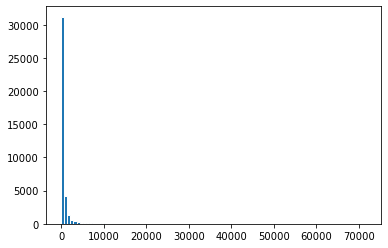

In [13]:
_ = plt.hist(ab.price, bins = 100, edgecolor = "white")
# It does not looks normal and it seems that the distribution has a long thin tail of high price
# It suggest me to do a log transformation

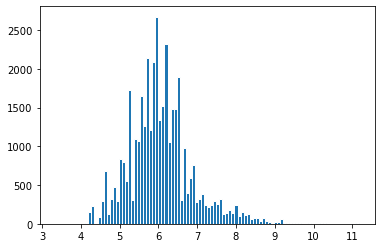

In [14]:
ab = ab[ab.price != 0]
_ = plt.hist(np.log(ab.price), bins = 100, edgecolor = "white")

# Below is the log transformation

4. (12pt) Convert the number of bedrooms into another variable with a limited number of categories only, such as 1, 2, 3, 4+; and now convert these into dummies.
Hint: consult the python companion for lecture notes https://otoomet.bitbucket.io/machinelearning-py.
html#cleaning_data.


In [15]:
ab["beds"] = ab["bedrooms"]
ab["beds"].loc[(ab["bedrooms"] == 1)] = "1"
ab["beds"].loc[(ab["bedrooms"] == 2)] = "2"
ab["beds"].loc[(ab["bedrooms"] == 3)] = "3"
ab["beds"].loc[(ab["bedrooms"] >= 4)] = "4+"

5. (14pt) Run an OLS where you explain the price with number of bedrooms where bedrooms
uses these four categories. Interpret the results, including R
2
.
Hint: if you choose 0-BR as the reference category, the eect for 1BR should be -12.62.

In [16]:
m = smf.ols("price ~ beds", data=ab).fit()
m.summary()

# b0 is 448.89, it means when number of bedrooms is 0, the price will be 448.89, and b0 is statistically significant
# b1 is -12.62, it means when number of bedrooms is 1, the price will be 12.62 lower than no bedroom, 
# and b1 is not statistically significant
# b2 is 296.73, it means when number of bedrooms is 2, the price will be 296.73 higher than no bedroom, 
# and b2 is statistically significant
# b3 is 745.78, it means when number of bedrooms is 3, the price will be 745.78 higher than no bedroom, 
# and b3 is statistically significant
# b4 is 2169.76, it means when number of bedrooms is 4 or more than 4, the price will be 2169.76 higher than no bedroom, 
# and b4 is statistically significant
# R^2 is 0.102, which means only 10.2% variations in price can be explained by number of bedrooms.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.102
Model:                            OLS   Adj. R-squared:                  0.102
Method:                 Least Squares   F-statistic:                     1096.
Date:                Tue, 24 Nov 2020   Prob (F-statistic):               0.00
Time:                        17:52:00   Log-Likelihood:            -3.4067e+05
No. Observations:               38614   AIC:                         6.814e+05
Df Residuals:                   38609   BIC:                         6.814e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    448.8851    107.114      4.191      0.000     238.938     658.832
beds[T.1]    -12.6220    107.604     -0.117      0.907    -223.528     198.284
beds[T.2]    296.7272    108.755      2.728      0.006      83.564     509.890
beds[T.3]    745.7844    111.917      6.664      0.000     526.424     965.145
beds[T.4+]  2169.7574    111.945     19.382      0.000    1950.342    2389.172
==============================================================================
Omnibus:                    95769.199   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       1548138818.391
Skew:                          26.937   Prob(JB):                         0.00
Kurtosis:                     982.450   Cond. No.                         35.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

6. (13pt) Now repeat the process with the model where you analyze log price instead of price.
Interpret the results. Which model behaves better in the sense of R
2
?
For the following tasks use either log(price) or price, depending on your answer here.

In [17]:
m2 = smf.ols("np.log(price) ~ beds", data=ab).fit()
m2.summary()

# b0 is 5.81, it means when number of bedrooms is 0, the log(price) will be 5.81, and b0 is statistically significant
# b1 is -0.03, it means when number of bedrooms is 1, the log(price) will be lowered by 0.03, and b1 is not statistically significant
# b2 is 0.53, it means when number of bedrooms is 2, the log(price) will be increased by 0.53, and b2 is statistically significant
# b3 is 0.94, it means when number of bedrooms is 3, the log(price) will be increased by 0.94, and b3 is statistically significant
# b4 is 1.59, it means when number of bedrooms is 4+, the log(price) will be increased by 1.59, and b4 is statistically significant
# Log behaves better in R^2 (0.322 > 0.102)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(price)   R-squared:                       0.322
Model:                            OLS   Adj. R-squared:                  0.321
Method:                 Least Squares   F-statistic:                     4574.
Date:                Tue, 24 Nov 2020   Prob (F-statistic):               0.00
Time:                        17:52:00   Log-Likelihood:                -39967.
No. Observations:               38614   AIC:                         7.994e+04
Df Residuals:                   38609   BIC:                         7.999e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.8117      0.044    130.777      0.000       5.725       5.899
beds[T.1]     -0.0326      0.045     -0.731      0.465      -0.120       0.055
beds[T.2]      0.5310      0.045     11.768      0.000       0.443       0.619
beds[T.3]      0.9394      0.046     20.231      0.000       0.848       1.030
beds[T.4+]     1.5949      0.046     34.341      0.000       1.504       1.686
==============================================================================
Omnibus:                     3819.053   Durbin-Watson:                   1.780
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            16566.368
Skew:                           0.412   Prob(JB):                         0.00
Kurtosis:                       6.101   Cond. No.                         35.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

7. (11pt) Finally we just add three more variables to the model: room type, accommodates, and
bathrooms. While room type only contains three values, the other two contain many dierent
categories. Recode these as
 accommodates: 1, 2, 3, 4 and more
 bathrooms: 0, 1, 2, 3 and more, where the 0.5 is rounded up to the next integer,
e.g. 0.5 becomes 1 and 1.5 becomes 2.
Run this model. Interpret and comment the more interesting/important results. Do not forget
to explain what are the relevant reference categories and R
2
.

In [18]:
ab["accomd"] = ab["accommodates"]
ab["accomd"].loc[(ab["accommodates"] == 1)] = "1"
ab["accomd"].loc[(ab["accommodates"] == 2)] = "2"
ab["accomd"].loc[(ab["accommodates"] == 3)] = "3"
ab["accomd"].loc[(ab["accommodates"] >= 4)] = "4 and more"

ab["bath"] = ab["bathrooms"]
ab["bath"].loc[(ab["bathrooms"] == 0)] = "0"
ab["bath"].loc[(ab["bathrooms"] >= 0.5)] = "1"
ab["bath"].loc[(ab["bathrooms"] >= 1.5)] = "2"
ab["bath"].loc[(ab["bathrooms"] >= 2.5)] = "3 and more"

In [19]:
m3 = smf.ols("np.log(price) ~ beds + room_type + accomd + bath", data=ab).fit()
m3.summary()

# The reference category is Entire home/apt with 0 bed, 1 accommodate and 0 bath.
# As we add more variable, R^2 is larger than before
# The P value for 1 and 2 baths is pretty large, which means there seems no relationship between price when there is 1 or 2 bathrooms
# From the summary table, it seems that shared room has the largest negative impact on price
# and number of bedrooms has the largest positive impact on price

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(price)   R-squared:                       0.458
Model:                            OLS   Adj. R-squared:                  0.458
Method:                 Least Squares   F-statistic:                     2723.
Date:                Tue, 24 Nov 2020   Prob (F-statistic):               0.00
Time:                        17:52:01   Log-Likelihood:                -35616.
No. Observations:               38614   AIC:                         7.126e+04
Df Residuals:                   38601   BIC:                         7.137e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                     5.5801      0.062     89.813      0.000       5.458       5.702
beds[T.1]                     0.0553      0.040      1.385      0.166      -0.023       0.134
beds[T.2]                     0.1899      0.041      4.641      0.000       0.110       0.270
beds[T.3]                     0.4919      0.042     11.635      0.000       0.409       0.575
beds[T.4+]                    0.8736      0.044     19.956      0.000       0.788       0.959
room_type[T.Private room]    -0.3242      0.007    -43.870      0.000      -0.339      -0.310
room_type[T.Shared room]     -0.9507      0.017    -56.414      0.000      -0.984      -0.918
accomd[T.2]                   0.3321      0.013     24.638      0.000       0.306       0.359
accomd[T.3]                   0.3935      0.017     23.647      0.000       0.361       0.426
accomd[T.4 and more]          0.6087      0.015     39.342      0.000       0.578       0.639
bath[T.1]                  5.958e-05      0.047      0.001      0.999      -0.092       0.092
bath[T.2]                     0.0343      0.047      0.723      0.470      -0.059       0.127
bath[T.3 and more]            0.5900      0.050     11.870      0.000       0.493       0.687
==============================================================================
Omnibus:                     8914.454   Durbin-Watson:                   1.781
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            51791.028
Skew:                           0.987   Prob(JB):                         0.00
Kurtosis:                       8.320   Cond. No.                         53.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 3 Extra credit (10pt = 1EC)
Here you have to introduce interaction terms: superhost×room type, and interpret the results
1. (1pt) add variable host is superhost to your data.

In [20]:
# Did that

2. (1pt) clean it in a way that only the observations with valid values (t and f ) are included
(drop the other instances).

In [21]:
# Did that

3. (2pt) introduce interaction eects between superhost and room type.
Hint: as there are 6 combinations of superhost and room type, your model should include 5
corresponding parameters.
Hint2: consult James et al. (2015), section 3.3.2 (Extensions of the Linear model) and Lecture
Notes Section 4.1.6 Interactions and Feature Transformations.

In [22]:
ab["mix"] = "True Apt"
ab["mix"].loc[(ab["host_is_superhost"] == "f") & (ab["room_type"] == "Entire home/apt")] = "f, entire"
ab["mix"].loc[(ab["host_is_superhost"] == "f") & (ab["room_type"] == "Private room")] = "f, private"
ab["mix"].loc[(ab["host_is_superhost"] == "f") & (ab["room_type"] == "Shared room")] = "f, share"

ab["mix"].loc[(ab["host_is_superhost"] == "t") & (ab["room_type"] == "Entire home/apt")] = "t, entire"
ab["mix"].loc[(ab["host_is_superhost"] == "t") & (ab["room_type"] == "Private room")] = "t, private"
ab["mix"].loc[(ab["host_is_superhost"] == "t") & (ab["room_type"] == "Shared room")] = "t, share"

m4 = smf.ols("np.log(price) ~ mix", data=ab).fit()
m4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(price)   R-squared:                       0.208
Model:                            OLS   Adj. R-squared:                  0.208
Method:                 Least Squares   F-statistic:                     2031.
Date:                Tue, 24 Nov 2020   Prob (F-statistic):               0.00
Time:                        17:52:01   Log-Likelihood:                -42948.
No. Observations:               38614   AIC:                         8.591e+04
Df Residuals:                   38608   BIC:                         8.596e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             6.3358      0.006   1115.757      0.000       6.325       6.347
mix[T.f, private]    -0.5716      0.009    -60.295      0.000      -0.590      -0.553
mix[T.f, share]      -1.4040      0.021    -66.367      0.000      -1.446      -1.363
mix[T.t, entire]     -0.0189      0.010     -1.807      0.071      -0.039       0.002
mix[T.t, private]    -0.6980      0.013    -51.857      0.000      -0.724      -0.672
mix[T.t, share]      -1.4142      0.034    -41.806      0.000      -1.481      -1.348
==============================================================================
Omnibus:                    10417.590   Durbin-Watson:                   1.807
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            30868.381
Skew:                           1.406   Prob(JB):                         0.00
Kurtosis:                       6.358   Cond. No.                         9.56
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

4. (6pt) interpret the interaction eect results

In [23]:
# The reference category is host is not super host with enitre home, at that situation the log(price) is 6.3358
# Below is under each condition, how price changes
# When host is not super host with private room, log(price) is lowered by 0.5716 compared to not super host with entire room
# When host is not super host with shared room, log(price) is lowered by -1.404 compared to not super host with entire room
# When host is super host with entire room, log(price) is lowered by -0.0189 compared to not super host with entire room
# When host is super host with private room, log(price) is lowered by -0.698 compared to not super host with entire room
# When host is super host with shared room, log(price) is lowered by -1.4142 compared to not super host with entire room
# R^2 is 0.208, which means only 20.8% variations in price can be explained by those varaiables.